In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [2]:
red_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep = ';')
white_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
white_wine.Name = 'white wine'
red_wine.Name = 'red wine'

red_wine['quality_label']= red_wine['quality'].apply(lambda val: 'low' if val <=5 else 'medium' if val <= 7 else 'high')
white_wine['quality_label'] = white_wine['quality'].apply(lambda x: 'low' if x <= 5 else 'medium' if x <= 7 else 'high')

red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], categories = ['low', 'medium', 'high'])
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], categories = ['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state = 42).reset_index(drop = True)

In [3]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,white
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,red
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,white
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,white
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,white


In [4]:
"""
We want to create a logistic regression model for predicting whether a wine is red or white.
"""

'\nWe want to create a logistic regression model for predicting whether a wine is red or white.\n'

In [7]:
# First, convert wine_type to 0 or 1.
# white wine = 0
# red wine = 1

wines['wine_type'] = wines['wine_type'].apply(lambda x: 0 if x == 'white' else 1)

In [8]:
wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,wine_type
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,high,0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,low,1
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,medium,0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,medium,0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,medium,0


<AxesSubplot:>

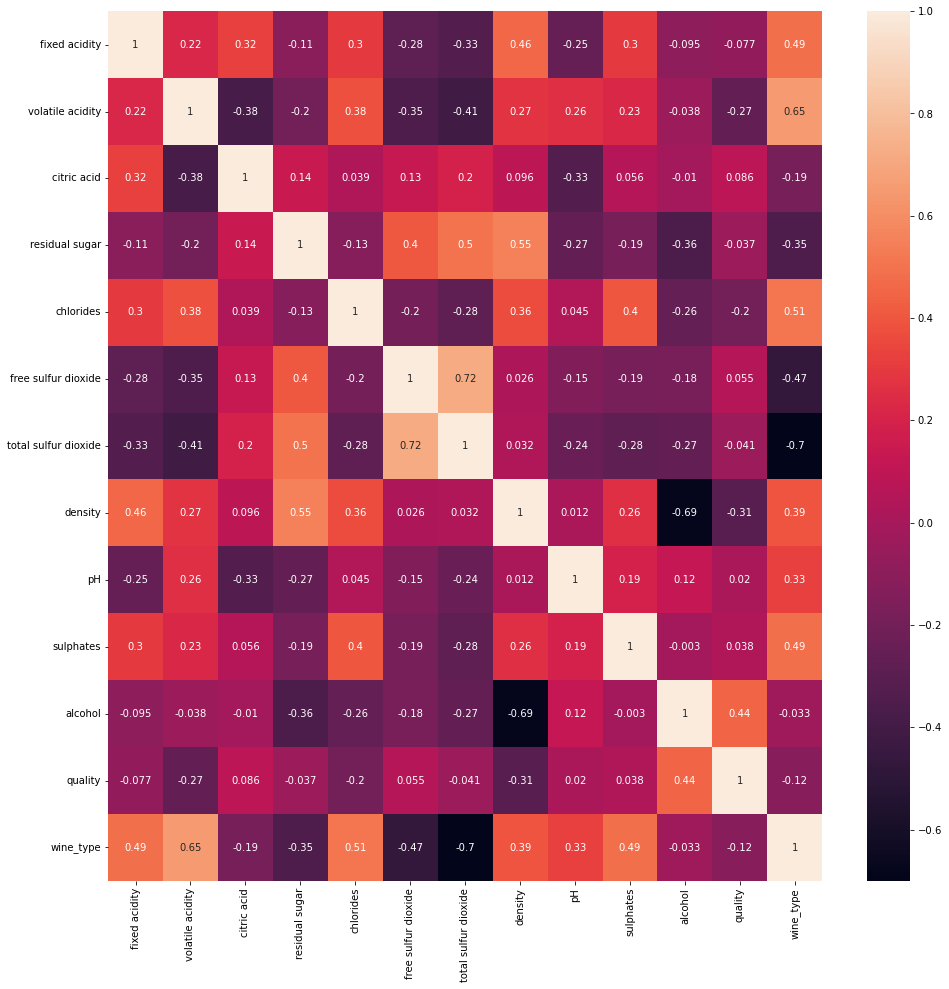

In [12]:
plt.figure(figsize=(16,16))
sns.heatmap(wines.corr(),annot=True)

In [ ]:
# Now we select the variables that have a correlation with 'wine_type' greater than 0.3
# These are: 
# 'fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates'


In [ ]:
### Train | Test Split and Scaling



In [14]:
X = wines[['fixed acidity', 'volatile acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']]
y = wines['wine_type']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [21]:
### Logistic Regression Model

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
log_model = LogisticRegression()

In [24]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [25]:
### Model Performance on Classification Tasks

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [27]:
y_pred = log_model.predict(scaled_X_test)

In [46]:
y_compare = pd.DataFrame(columns = ['y_test', 'y_pred'])
y_compare ['y_test'] = y_test
y_compare ['y_pred'] = y_pred


In [49]:
y_compare.head()

,y_test,y_pred
868,0,0
5097,1,1
5450,0,0
5850,0,0
2192,0,0


In [53]:
y_compare['correct'] = y_compare['y_test'] == y_compare['y_pred']

<AxesSubplot:xlabel='correct'>

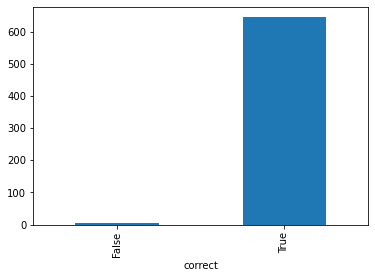

In [65]:
y_compare.groupby('correct').count()['y_test'].plot(kind = 'bar')

In [67]:
# check accuracy
accuracy_score(y_test,y_pred)

0.9923076923076923

In [68]:
confusion_matrix(y_test,y_pred)

array([[479,   2],
       [  3, 166]])

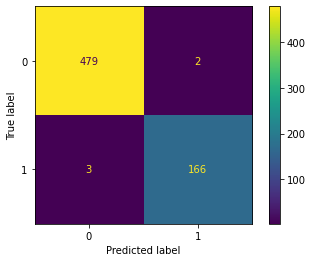

In [69]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

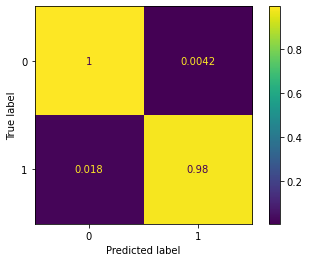

In [73]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')
# So we're predicting white wines with over 99.9% accuracy, and red wines with over 98% accuracy.

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       481
           1       0.99      0.98      0.99       169

    accuracy                           0.99       650
   macro avg       0.99      0.99      0.99       650
weighted avg       0.99      0.99      0.99       650



In [74]:
from sklearn.metrics import precision_recall_curve,plot_precision_recall_curve,plot_roc_curve

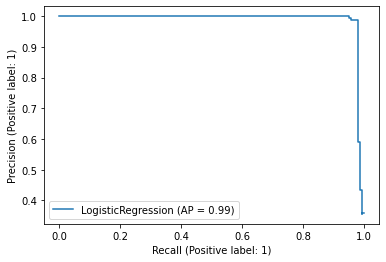

In [75]:
plot_precision_recall_curve(log_model,scaled_X_test,y_test)

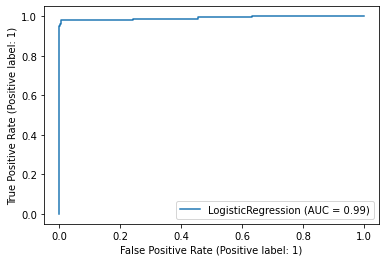

In [76]:
plot_roc_curve(log_model,scaled_X_test,y_test)